# Логистическая регрессия. Практика

В этом задании вам предлагается спрогнозировать, купит клиент велосипед или нет, обучив логистическую регрессию.

In [1]:
# подключим библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# считаем данные
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/bike_buyers_clean.csv')

In [3]:
# выводим первые 5 строк датафрейма
data.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [4]:
# смотрим размер датафрейма
data.shape

(1000, 13)

Выведите статистики по категориальным признакам, чтобы посмотреть, сколько категорий в каждом категориальном (нечисловом) признаке.

Для этого можно воспользоваться методом `describe` из библиотеки pandas со значением параметра `include = 'object'`.

**Вопрос:** в каком категориальном признаке встречаются три различных значения?

In [5]:
data.describe(include='object') # в region чаще всего встречаются три значения

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,5,5,2,5,3,2
top,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America,No
freq,539,509,306,276,685,366,508,519


Закодируйте все категориальные столбцы с двумя категориями следующим образом:  
самая часто встречающаяся категория превращается в 1, другая в 0.

In [6]:
def encode_column(column):
    most_frequent = column.mode()[0]
    return column.apply(lambda x: 1 if x == most_frequent else 0)

data = data.apply(lambda col: encode_column(col) if col.nunique() == 2 else col)

data.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,1
1,24107,1,1,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,1
2,14177,1,1,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,1
3,24381,0,1,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,0
4,25597,0,1,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,0


Удалите остальные категориальные столбцы.

**Вопрос:** сколько категориальных столбцов вы удалили?

In [7]:
data = data.drop(['Education','Occupation', 'Commute Distance', 'Region', 'ID'], axis=1)

Удалите столбец `ID`, так как он по сути нечисловой.

Сформируйте матрицу объект-признак `X` и вектор `y` с целевой переменной.  
Целевая переменная - это последний столбец, `Purchased Bike`.

In [8]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']

Разбейте данные на тренировочную и тестовую часть (`Xtrain`, `Xtest`, `ytrain`, `ytest`), в тест отправьте 30% данных.  
Зафиксируйте `random_state = 42`.

In [9]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)

**Вопрос:** сколько объектов в матрице `Xtrain`?

In [10]:
Xtrain.shape[0]

700

Почти всё готово для обучения модели!

Осталось отмасштабировать матрицу `X`, так как линейные модели чувствительны к масштабу данных.

*  Обучите на тренировочной матрице (`Xtrain`) `MinMaxScaler` из библиотеки `sklearn.preprocessing`
*  Примените масштабирование и к `Xtrain`, и к `Xtest`
*  Переведите полученные после масштабирования `np.array` обратно в pandas `dataframe`.

Полученные масштабированные матрицы назовите, как и раньше, `Xtrain` и `Xtest`.

In [11]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()

Xtrain = minMaxScaler.fit_transform(Xtrain)
Xtest = minMaxScaler.transform(Xtest)

Теперь обучите логистическую регрессию на тренировочных данных

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(Xtrain, ytrain)

LogisticRegression()

Сделайте предсказания на тренировочных и на тестовых данных.

In [13]:
predict_train = logreg.predict(Xtrain)
predict_test = logreg.predict(Xtest)

Оцените значение accuracy на трейне и на тесте.

In [14]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(ytrain, predict_train)
test_score = accuracy_score(ytest, predict_test)
print(train_score, test_score)

0.6342857142857142 0.5766666666666667


Качество модели получилось невысоким, зато модель не переобучена.

Попробуем добавить новых признаков в модель, используя [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Создайте полиномиальные признаки degree = 2.

Как обычно:
*  `fit` делайте на тренировочных данных
*  `transform` и на тренировочных, и на тестовых данных. Затем верните результат к формату pandas `dataframe`.

Полученные матрицы назовите, как и раньше, `Xtrain` и `Xtest`.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

Xtrain = pf.fit_transform(Xtrain)
Xtest = pf.transform(Xtest)

Xtrain.shape[1] # на 29 пунктов

36

**Вопрос:** на сколько признаков стало больше при добавлении полиномиальных признаков второй степени?

Заново обучите логистическую регрессию, уже на расширенной матрице признаков, и сделайте предсказания на трейне и тесте, а затем оцените качество (*accuracy*).

In [16]:
logreg= LogisticRegression()

logreg.fit(Xtrain, ytrain)

predict_train = logreg.predict(Xtrain)
predict_test = logreg.predict(Xtest)

train_score = accuracy_score(ytrain, predict_train)
test_score = accuracy_score(ytest, predict_test)

print(train_score, test_score)

0.6857142857142857 0.6233333333333333


**Вопрос:** на сколько повысилось качество модели на тестовых данных?  
Ответ округлите до сотых.

Появились новые требования от заказчика!

Заказчик просит, чтобы:
*  доля найденных моделью потенциальных покупателей была максимальной
*  accuracy при этом была не ниже, чем 0.6 (отклонения *accuracy* на тестовых данных на $\pm 0.05$ допустимы).

Сначала посмотрите, какие значения *recall* и *accuracy* имеют предсказния модели на тесте с классами, предсказанными по умолчанию (методом `predict`).

In [17]:
from sklearn.metrics import recall_score, accuracy_score

accuracy = accuracy_score(ytest, predict_test)
recall = recall_score(ytest, predict_test)
print(accuracy, recall)

0.6233333333333333 0.6959459459459459


Подберём порог для перевода вероятностей в классы, чтобы оптимизировать требуемые метрики!

Разобъем тренировочные данные на трейн и валидацию, чтобы по валидационной части подбирать порог.

In [18]:
XtrainS, Xval, ytrainS, yval = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=42)

XtrainS.shape, Xval.shape

((490, 36), (210, 36))

* Обучите модель на тренировочных данных.
* Предскажите вероятности положительного класса на валидационных данных

В цикле для каждого значения порога:
*  переведите вероятности в классы
*  вычислите полноту (на валидационных данных)

Выведите на экран:

1) значение порога, дающее максимальный *recall*, при условии, что *accuracy* $\geq$ 0.6.

2) значение *recall* при этом пороге

3) значение *accuracy* для этого порога


Ищите порог на отрезке от 0 до 1 с шагом 0.01.

0.42, 0.85, 0.61


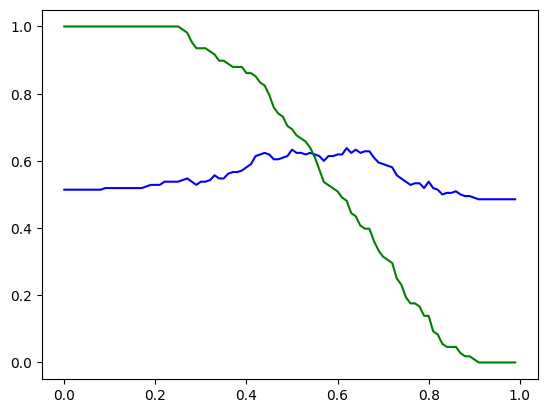

In [55]:
RecMax = -1
BestThr = -1
BestAcc = -1

lr = LogisticRegression()
lr.fit(XtrainS, ytrainS)

pred_proba = lr.predict_proba(Xval)

accuracy = []
rec = []
th = []

for thr in np.arange(0, 1, 0.01):
    classes = np.where(pred_proba[:,1]>=thr, 1, 0)

    recall = recall_score(yval, classes)
    acc = accuracy_score(yval, classes)

    accuracy.append(acc)
    rec.append(recall)
    th.append(thr)

    if recall > RecMax and acc >= 0.6:
      RecMax = recall
      BestThr = thr
      BestAcc = acc

print(f'{BestThr:.2f}, {RecMax:.2f}, {BestAcc:.2f}')

plt.plot(th, accuracy, c='blue')
plt.plot(th, rec, c='green')

Теперь заново обучите модель на исходных тренировочных данных (`Xtrain`, `ytrain`), предскажите вероятности на тесте и переведите их в классы по найденному порогу.

In [56]:
log_reg = LogisticRegression()

log_reg.fit(Xtrain, ytrain)

predictions = log_reg.predict_proba(Xtest)
classes = np.where(predictions[:,1]>=BestThr, 1, 0)

recall_score(ytest, classes)

0.8040540540540541

**Вопрос:** какое значение *recall* получилось на тестовых данных после подбора порога?  
Ответ округлите до десятых.

При помощи подбора порога удалось сильно увеличить значение *recall*!  
Однако, как видно, на тесте не удалось сохранить условие $accuracy \geq 0.6$ (но в допустимые рамки уложились!)

Это свидетельство небольшого переобучения модели. Однако в сухом остатке имеет значительное увеличение полноты, что является приоритетом для заказчика.